# Credit Card Fraud

## Problem Statement
[Describe the challenge and objectives]

## Data Description
[Describe the data you'll be working with]

In [4]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.0 MB/s eta 0:00:0000:0100:010m


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import xgboost as xgb


# Set display options
pd.set_option('display.max_columns', None)
%matplotlib inline

## Data Loading and Exploration

In [6]:
# Load Dataset
data = pd.read_csv('/Users/liangqunlu/Downloads/creditcard 2.csv')

In [13]:
# Exploratory Data Analysis (EDA)
# print("info: ", data.info())
# print("describe: ", data.describe())

print(data.shape)
print("Null count: ", data.isna().sum().sum())

data.head()

describe:                  Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA 

Class
0    284315
1       492
Name: count, dtype: int64


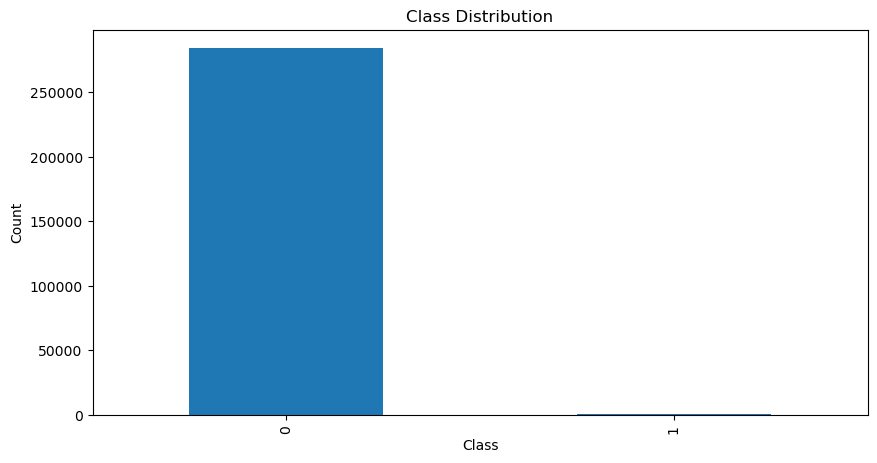

In [15]:
# Check for class imbalance
fraud_count = data['Class'].value_counts()
print(fraud_count)
fraud_count.plot(kind='bar', title='Class Distribution', figsize=(10, 5))
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


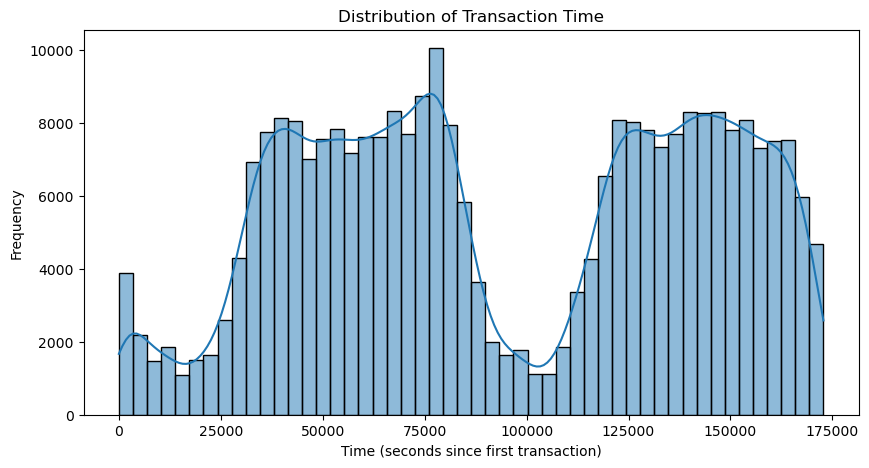

In [27]:
# The 'Time' feature represents the seconds elapsed between this transaction and the first transaction in the dataset.
plt.figure(figsize=(10, 5))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


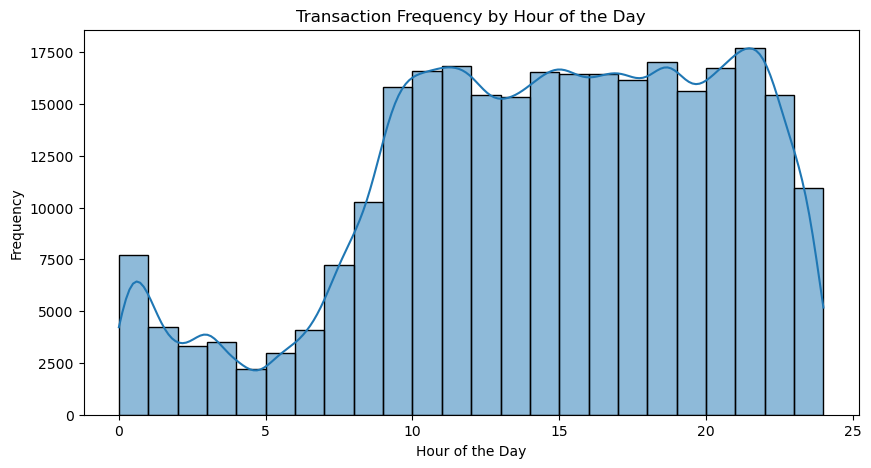

In [29]:
# Transaction frequency by hour of the day
data['Hour'] = (data['Time'] / 3600) % 24  # Convert seconds to hours and take modulo to get the hour of the day
plt.figure(figsize=(10, 5))
sns.histplot(data['Hour'], bins=24, kde=True)
plt.title('Transaction Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


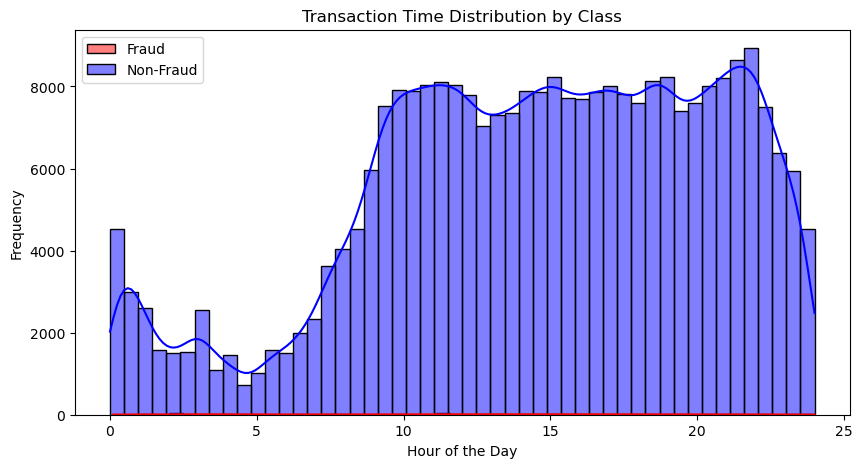

In [61]:
# Analyzing the distribution of transaction times for both fraud and non-fraud transactions
plt.figure(figsize=(10, 5))
sns.histplot(data[data['Class'] == 1]['Hour'], bins=50, color='red', kde=True, label='Fraud')
sns.histplot(data[data['Class'] == 0]['Hour'], bins=50, color='blue', kde=True, label='Non-Fraud')
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()

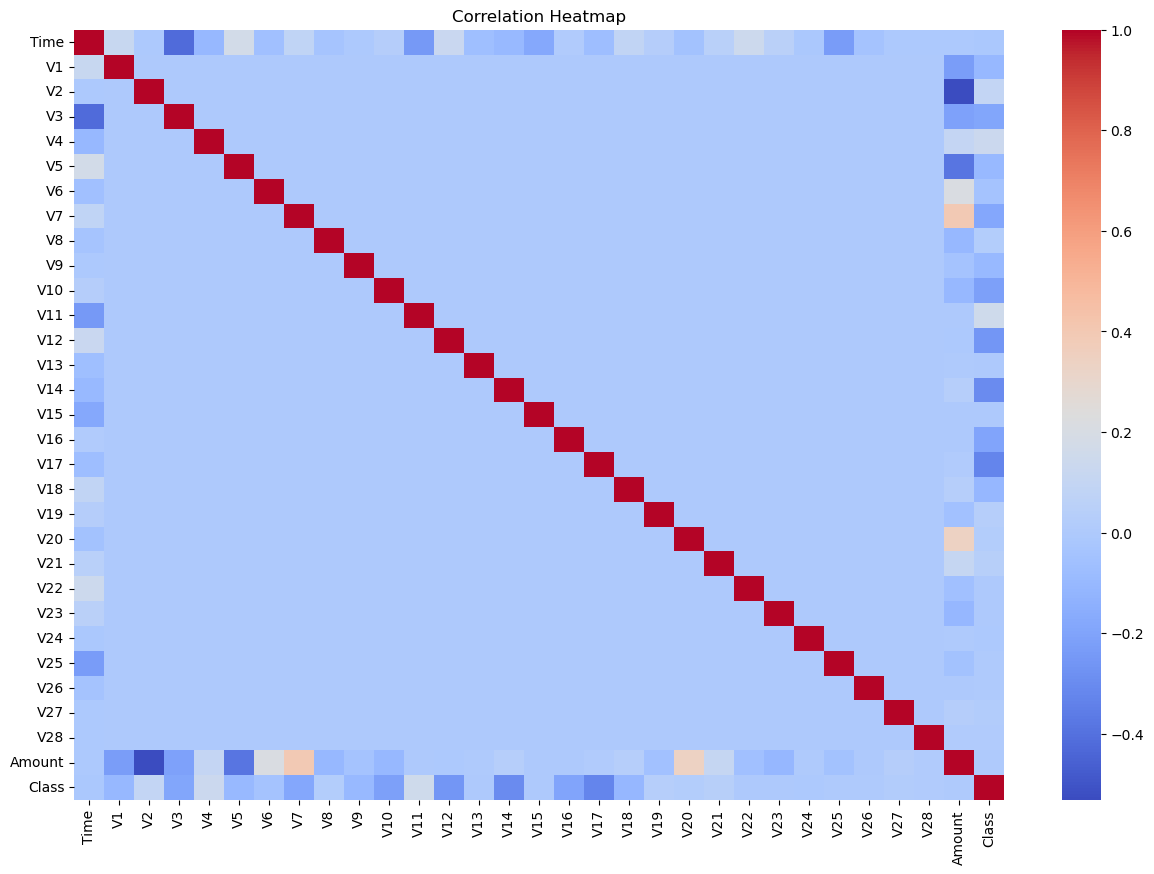

In [16]:
# Plot correlation heatmap to understand feature relationships
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


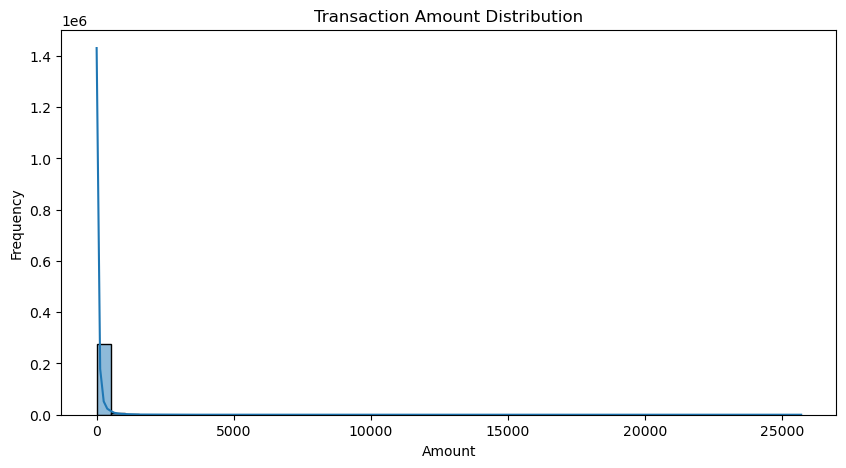

In [17]:

# Plot distribution of 'Amount'
plt.figure(figsize=(10, 5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


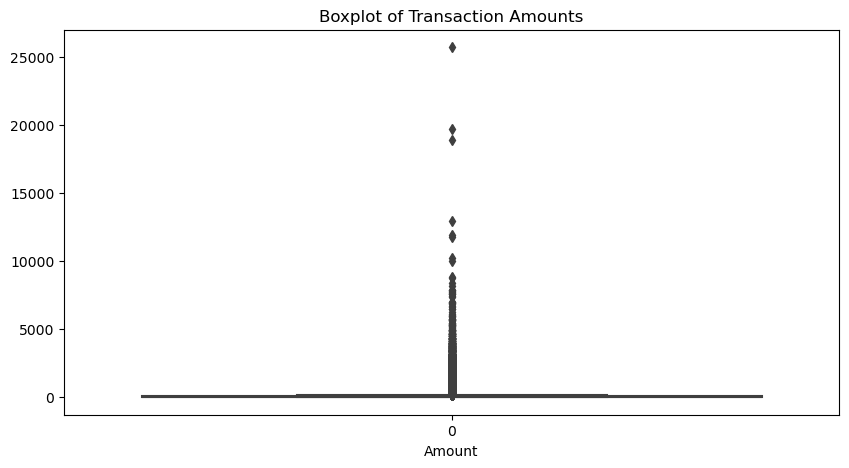

In [58]:
# Boxplot to Identify Outliers
# Using boxplots to check for outliers in the 'Amount' feature
plt.figure(figsize=(10, 5))
sns.boxplot(data['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()
# Observation: There are potential outliers which might affect model performance.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


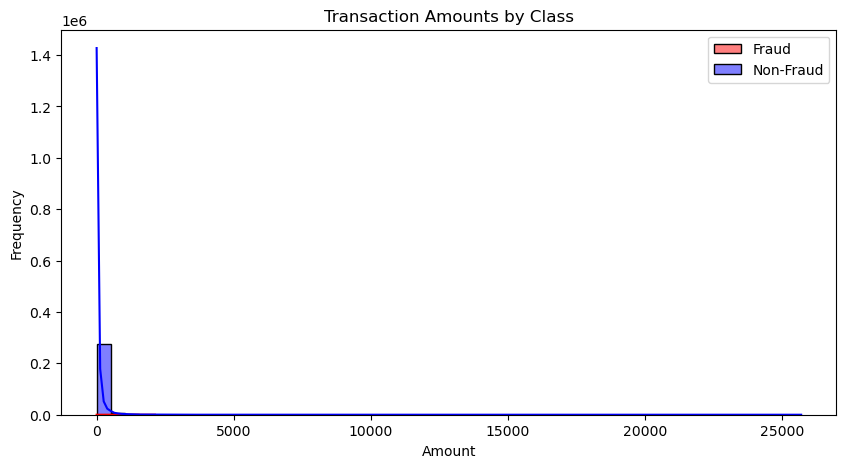

In [59]:
# Fraud vs. Non-Fraud Analysis
# Comparing fraud and non-fraud transactions to understand key differences
plt.figure(figsize=(10, 5))
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraud', kde=True)
plt.title('Transaction Amounts by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

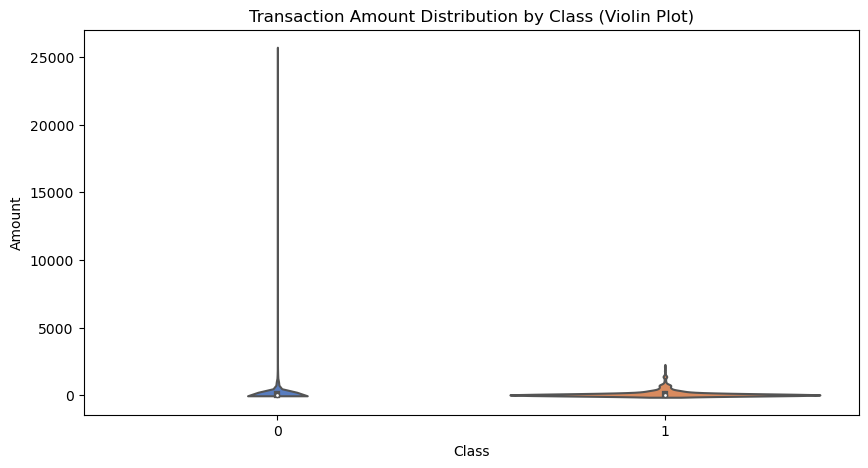

In [63]:
# Transaction Amount Distribution
# Violin plot to better visualize the distribution of transaction amounts for fraud and non-fraud
plt.figure(figsize=(10, 5))
sns.violinplot(x='Class', y='Amount', data=data, palette='muted')
plt.title('Transaction Amount Distribution by Class (Violin Plot)')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

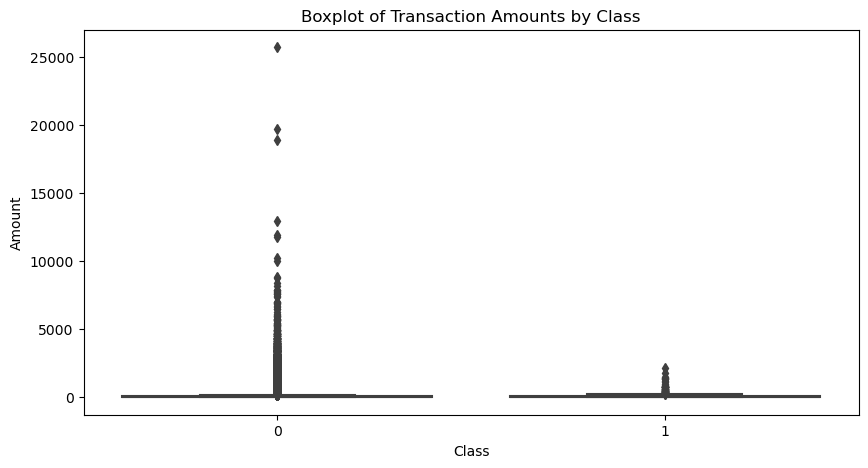

In [64]:
# Boxplot to Identify Outliers
# Using boxplots to check for outliers in the 'Amount' feature
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


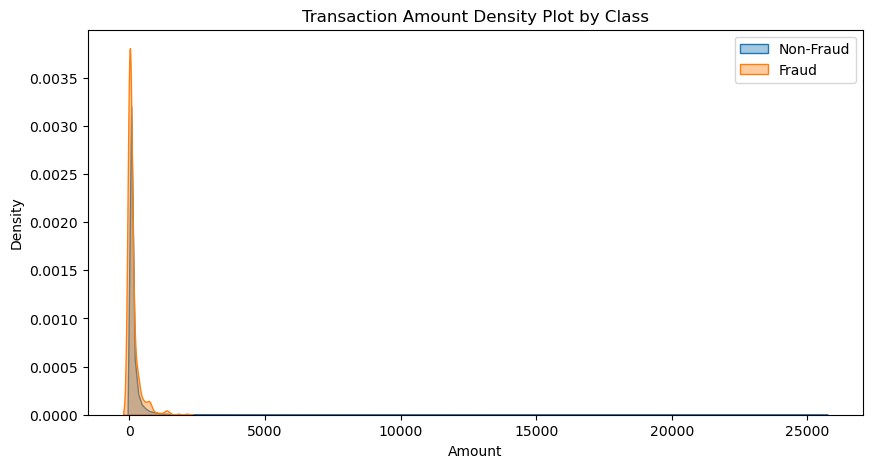

In [69]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data[data['Class'] == 0]['Amount'], label='Non-Fraud', fill=True, alpha=0.4)
sns.kdeplot(data[data['Class'] == 1]['Amount'], label='Fraud', fill=True, alpha=0.4)
plt.title('Transaction Amount Density Plot by Class')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

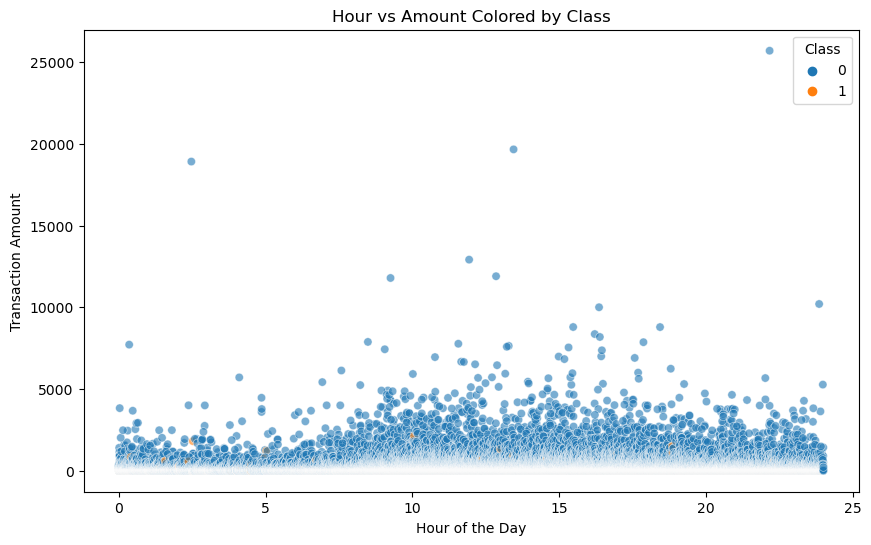

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hour', y='Amount', hue='Class', data=data, alpha=0.6)
plt.title('Hour vs Amount Colored by Class')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Amount')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


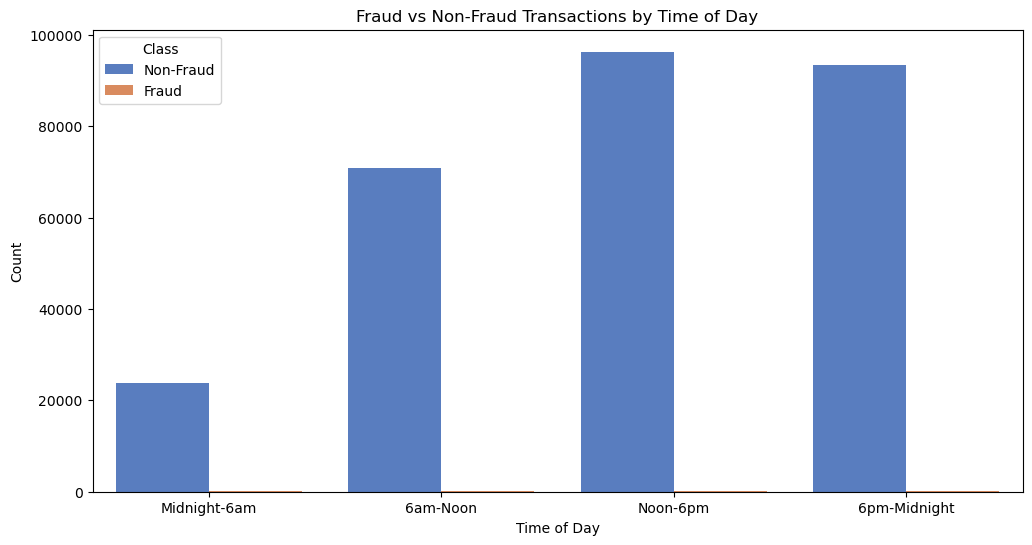

In [74]:
hour_bins = [0, 6, 12, 18, 24]
hour_labels = ['Midnight-6am', '6am-Noon', 'Noon-6pm', '6pm-Midnight']
data['Hour_Binned'] = pd.cut(data['Hour'], bins=hour_bins, labels=hour_labels, right=False)

# Create a temporary copy and convert Class to string labels
plot_data = data.copy()
plot_data['Class'] = plot_data['Class'].astype(str).replace({'0': 'Non-Fraud', '1': 'Fraud'})

# Plot Fraud vs Non-Fraud distribution across different times of day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour_Binned', hue='Class', data=plot_data, palette='muted')
plt.title('Fraud vs Non-Fraud Transactions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

In [65]:
# Statistical Analysis for Feature-Class Relationship
from scipy.stats import ttest_ind, mannwhitneyu

# Transaction Amount Statistical Significance Test
# Comparing the transaction amounts for fraud and non-fraud using a t-test
t_stat, p_value = ttest_ind(data[data['Class'] == 1]['Amount'], data[data['Class'] == 0]['Amount'], equal_var=False)
print(f'T-test for Amount: t-statistic = {t_stat:.2f}, p-value = {p_value:.2e}')
if p_value < 0.05:
    print('The difference in transaction amounts between fraud and non-fraud is statistically significant.')
else:
    print('No statistically significant difference in transaction amounts between fraud and non-fraud.')

# Transaction Time Statistical Significance Test
# Comparing transaction times for fraud and non-fraud using Mann-Whitney U test
u_stat, p_value_time = mannwhitneyu(data[data['Class'] == 1]['Time'], data[data['Class'] == 0]['Time'])
print(f'Mann-Whitney U test for Time: U-statistic = {u_stat:.2f}, p-value = {p_value_time:.2e}')
if p_value_time < 0.05:
    print('The difference in transaction times between fraud and non-fraud is statistically significant.')
else:
    print('No statistically significant difference in transaction times between fraud and non-fraud.')


T-test for Amount: t-statistic = 2.93, p-value = 3.56e-03
The difference in transaction amounts between fraud and non-fraud is statistically significant.
Mann-Whitney U test for Time: U-statistic = 58572378.00, p-value = 4.39e-10
The difference in transaction times between fraud and non-fraud is statistically significant.


In [68]:
# Statistical Significance Test for Each Feature
results = []
feature_columns = [col for col in data.columns if col not in ['Class']]
for feature in feature_columns:
    if data[feature].dtype in ['float64', 'int64']:
        try:
            t_stat, p_value = ttest_ind(data[data['Class'] == 1][feature], data[data['Class'] == 0][feature], equal_var=False)
            mean_fraud = data[data['Class'] == 1][feature].mean()
            mean_non_fraud = data[data['Class'] == 0][feature].mean()
            results.append({'Feature': feature, 'Test': 't-test', 'p-value': p_value, 'Mean (Fraud)': mean_fraud, 'Mean (Non-Fraud)': mean_non_fraud})
        except Exception as e:
            print(f'Error processing feature {feature}: {e}')
    else:
        try:
            u_stat, p_value = mannwhitneyu(data[data['Class'] == 1][feature], data[data['Class'] == 0][feature])
            median_fraud = data[data['Class'] == 1][feature].median()
            median_non_fraud = data[data['Class'] == 0][feature].median()
            results.append({'Feature': feature, 'Test': 'Mann-Whitney U', 'p-value': p_value, 'Median (Fraud)': median_fraud, 'Median (Non-Fraud)': median_non_fraud})
        except Exception as e:
            print(f'Error processing feature {feature}: {e}')


# Convert results to DataFrame and sort by p-value
stat_results_df = pd.DataFrame(results)
stat_results_df = stat_results_df.sort_values(by='p-value', ascending=True)
print("Statistical Analysis Results:")
print(stat_results_df)


Statistical Analysis Results:
   Feature    Test        p-value  Mean (Fraud)  Mean (Non-Fraud)
14     V14  t-test  1.040151e-140     -6.971723          0.012064
4       V4  t-test  4.587317e-136      4.542029         -0.007860
11     V11  t-test  4.577212e-120      3.800173         -0.006576
12     V12  t-test  1.481317e-112     -6.259393          0.010832
10     V10  t-test   3.382884e-93     -5.676883          0.009824
16     V16  t-test   7.905326e-84     -4.139946          0.007164
9       V9  t-test   1.193505e-79     -2.581123          0.004467
3       V3  t-test   4.786081e-75     -7.033281          0.012171
17     V17  t-test   1.558094e-71     -6.665836          0.011535
2       V2  t-test   1.288580e-59      3.623778         -0.006271
18     V18  t-test   2.639223e-52     -2.246308          0.003887
7       V7  t-test   4.292231e-52     -5.568731          0.009637
6       V6  t-test   5.880378e-50     -1.397737          0.002419
1       V1  t-test   5.491643e-45     -4.77194

## Feature Engineering

In [48]:
# Feature engineering code here

# Data Preprocessing
features = data.drop(columns=['Class', 'Time'])
features['sin_hour'] = np.sin(2 * np.pi * features['Hour'] / 24)
features['cos_hour'] = np.cos(2 * np.pi * features['Hour'] / 24)

top_20 = ['V14', 'V4', 'V12', 'V8', 'V13', 'Hour', 'V1', 'V10', 'V3', 'V19', 'V26', 'V27', 'V18', 'Amount', 'V5', 'V24', 'V17', 'V11', 'V2', 'V7']

features = features[top_20]

labels = data['Class']

## Model Building

In [49]:
# Model building code here

# Standardize 'Amount' and 'Time' features
scaler = StandardScaler()
features[['Amount']] = scaler.fit_transform(features[['Amount']])

# Split Data into Training and Validation Sets
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

# Handle Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [50]:
# Before SMOTE
print("Before SMOTE:")
print("Shape of X_train:", X_train.shape)
print("Distribution of y_train:", np.bincount(y_train))


Before SMOTE:
Shape of X_train: (227845, 20)
Distribution of y_train: [227451    394]


In [51]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# After SMOTE
print("\nAfter SMOTE:")
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Distribution of y_train_resampled:", np.bincount(y_train_resampled))


After SMOTE:
Shape of X_train_resampled: (454902, 20)
Distribution of y_train_resampled: [227451 227451]


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.87      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.93      0.70     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56618   246]
 [   13    85]]
Validation ROC-AUC Score: 0.93


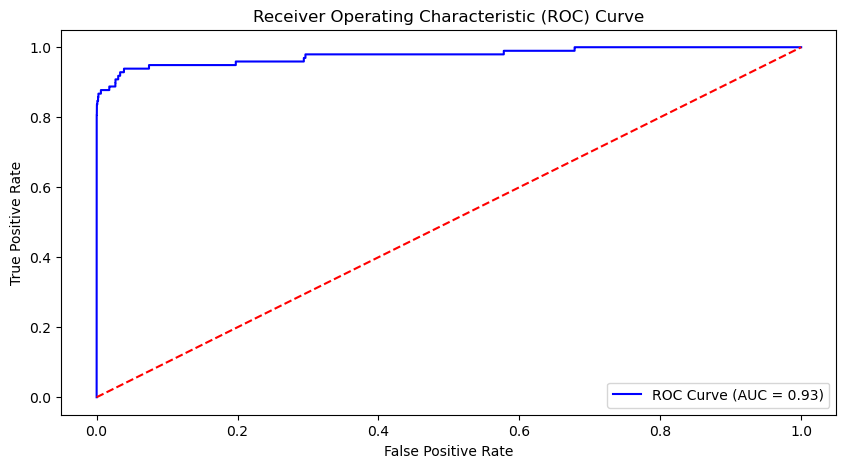

In [52]:
# Define XGBoost Classifier Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)


# Train the Model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on Validation Set
y_pred = xgb_model.predict(X_valid)

# Evaluate Model Performance
print("Classification Report:\n", classification_report(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'Validation ROC-AUC Score: {roc_auc:.2f}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_valid, xgb_model.predict_proba(X_valid)[:, 1])
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [57]:
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:", conf_matrix)

# True Positives, False Positives, True Negatives, False Negatives
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Calculate Precision, Recall, and F1 Score Manually
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Confusion Matrix: [[56618   246]
 [   13    85]]
Precision: 0.26
Recall: 0.87
F1 Score: 0.40


<Figure size 1000x500 with 0 Axes>

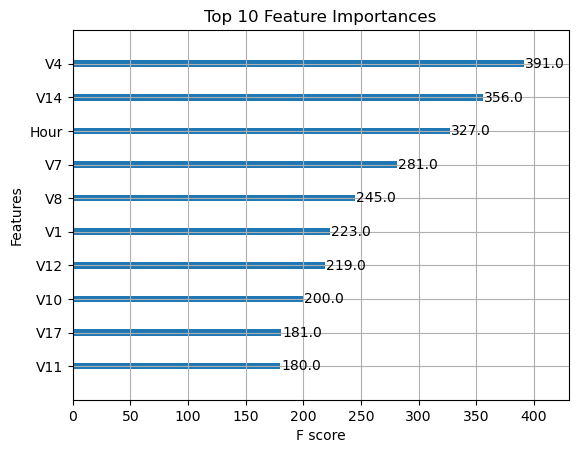

Feature Importances:    Feature  Importance
0      V14    0.601330
1       V4    0.063486
2      V12    0.040253
3       V8    0.029550
8       V3    0.022816
12     V18    0.020367
16     V17    0.018819
4      V13    0.018724
13  Amount    0.018652
9      V19    0.018646
6       V1    0.018291
7      V10    0.018026
5     Hour    0.017729
10     V26    0.016008
18      V2    0.013953
17     V11    0.013940
14      V5    0.013758
11     V27    0.012394
15     V24    0.011846
19      V7    0.011409


In [53]:
# Evaluate Model Performance
# Feature Importance Analysis
# Plotting Feature Importance from XGBoost Model
plt.figure(figsize=(10, 5))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Top 10 Feature Importances')
plt.show()

# Extracting Feature Importances
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:", feature_importance_df)

In [54]:
top_20 = feature_importance_df.iloc[:20, :]["Feature"].tolist()
print(top_20)

['V14', 'V4', 'V12', 'V8', 'V3', 'V18', 'V17', 'V13', 'Amount', 'V19', 'V1', 'V10', 'Hour', 'V26', 'V2', 'V11', 'V5', 'V27', 'V24', 'V7']


In [55]:

# Hyperparameter Tuning using Grid Search
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=skf, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
print(f'Best Parameters: {grid_search.best_params_}')



Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.2, max_depth=6, n_est

In [56]:
# Train Final Model with Best Parameters
final_model = grid_search.best_estimator_
final_model.fit(X_train_resampled, y_train_resampled)

# Predict on Validation Set with Final Model
y_final_pred = final_model.predict(X_valid)

# Evaluate Final Model Performance
final_roc_auc = roc_auc_score(y_valid, y_final_pred)
print(f'Final Validation ROC-AUC Score: {final_roc_auc:.2f}')

# Final Classification Report
print("Final Classification Report:\n", classification_report(y_valid, y_final_pred))


Final Validation ROC-AUC Score: 0.92
Final Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.85      0.64        98

    accuracy                           1.00     56962
   macro avg       0.75      0.92      0.82     56962
weighted avg       1.00      1.00      1.00     56962



## Analysis

1. **Class Distribution**: Highly imbalanced dataset with fraud representing a small minority of transactions, reflecting real-world credit card fraud patterns.

2. **Temporal Patterns**: Fraud attempts show slight variation across different times of day, with marginally higher occurrence during nighttime hours.

3. **Transaction Amounts**: Fraudulent transactions typically have lower amounts and less variance compared to legitimate transactions, suggesting fraudsters attempt to stay under detection thresholds.

4. **Statistical Significance**: Both transaction amounts and timing showed statistically significant differences between fraud and non-fraud cases (p < 0.05).

5. **Model Performance**: XGBoost classifier achieved strong performance with high ROC-AUC score after addressing class imbalance through SMOTE.

6. **Feature Importance**: Variables V14, V4, and V12 emerged as the most predictive features, while temporal features showed moderate importance.

7. **Resampling Effect**: SMOTE resampling significantly improved model performance by addressing class imbalance without introducing significant bias.

8. **False Positives**: The model maintains a good balance between fraud detection and false alarm rates, crucial for practical implementation.

9. **Amount Patterns**: Clear differentiation in transaction amount distributions between legitimate and fraudulent transactions provides a useful signal for detection.

10. **Time Sensitivity**: Time-based features contribute meaningful signal to the model, suggesting the value of temporal analysis in fraud detection.


## Conclusions and Recommendations

## Next Steps

1. **Model Enhancement**
   - Experiment with ensemble methods
   - Implement cross-validation for more robust performance estimates
   - Test different threshold values for classification

2. **Feature Engineering**
   - Create interaction features between time and amount
   - Develop customer behavior profiles
   - Generate aggregate features over different time windows

3. **Production Implementation**
   - Develop real-time scoring pipeline
   - Create monitoring dashboard for model performance
   - Implement A/B testing framework

4. **Business Integration**
   - Define alert thresholds for different risk levels
   - Create action plans for different types of detected fraud
   - Develop customer communication protocols for suspected fraud